# Supplementary Practice Problems

These are similar to programming problems you may encounter in the mid-terms. They are not graded but we will review them in lab sessions.

**1**. (10 points) Normalize the $3 \times 4$ diagonal matrix with diagonal (1, ,2, 3) so all rows have mean 0 and standard deviation 1. The matrix has 0 everywhere not on the diagonal.

In [1]:
import numpy as np
M = np.concatenate([np.diag([1,2,3]),np.zeros((3,1))], axis=1)
# M = np.c_[np.diag([1,2,3]), [0]*3]
(M - M.mean(axis=1)[:,None]) / M.std(axis=1)[:,None]

array([[ 1.73205081, -0.57735027, -0.57735027, -0.57735027],
       [-0.57735027,  1.73205081, -0.57735027, -0.57735027],
       [-0.57735027, -0.57735027,  1.73205081, -0.57735027]])

**2**. (10 points) A fixed point of a funciton is a value that remains the same when the funciton is applied to it, that is $f(x) = x$. Write a function that finds the fixed poitn of another function $f$ given an intiial value $x_0$. For example, if

$$f(x) \rightarrow \sqrt{x}$$

and 

$x_0$ is any positive real number, then the function should return 1 since

$$\sqrt{1} = 1$$

Not all funcitons have a fixed point - if it taakes over 1,000 iterations, the fucntion shold return None.

- Use the function signature `fixed_point(f, x0, max_iter=1000)`. 
- Test with `fixed_point(np.sqrt, 10)`.

In [2]:
def fixed_point(f, x0, max_iter=1000):
    eps = 1e-20
    for i in range(max_iter):
        tmp = f(x0)
        if np.abs(tmp-x0)<=eps:
            return x0
        x0 = tmp
    return None
    
fixed_point(np.sqrt, 10)

1.0

**3**. (10 points) Use `np.fromfunction` to construc the following matrices

```python
array([[5, 0, 0, 0, 5],
       [0, 4, 0, 4, 0],
       [0, 0, 3, 0, 0],
       [0, 2, 0, 2, 0],
       [1, 0, 0, 0, 1]])
```

```python
array([[0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 0]])
```

```python
array([[6, 5, 4, 3, 4, 5, 6],
       [5, 4, 3, 2, 3, 4, 5],
       [4, 3, 2, 1, 2, 3, 4],
       [3, 2, 1, 0, 1, 2, 3],
       [4, 3, 2, 1, 2, 3, 4],
       [5, 4, 3, 2, 3, 4, 5],
       [6, 5, 4, 3, 4, 5, 6]])
```

In [3]:
np.fromfunction(lambda i,j: np.where((i==j) | (i+j==4), 5-i, 0), (5,5), dtype='int')

array([[5, 0, 0, 0, 5],
       [0, 4, 0, 4, 0],
       [0, 0, 3, 0, 0],
       [0, 2, 0, 2, 0],
       [1, 0, 0, 0, 1]])

In [4]:
np.fromfunction(lambda i,j: np.where( np.abs(i-j)==1, 1, 0), (6,6), dtype='int')

array([[0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 0]])

In [5]:
np.fromfunction(lambda i,j: np.abs(i-3)+np.abs(j-3), (7,7),dtype='int')

array([[6, 5, 4, 3, 4, 5, 6],
       [5, 4, 3, 2, 3, 4, 5],
       [4, 3, 2, 1, 2, 3, 4],
       [3, 2, 1, 0, 1, 2, 3],
       [4, 3, 2, 1, 2, 3, 4],
       [5, 4, 3, 2, 3, 4, 5],
       [6, 5, 4, 3, 4, 5, 6]])

**4**. (10 points) Read the `mtcars` data frame from R to a `pandas` DataFrame. Find the mean `wt` and `mpg` for all cars grouped by the number of `gear`s.

In [6]:
import pandas as pd
%load_ext rpy2.ipython
%R -o mtcars
mtcars.groupby('gear')[['wt', 'mpg']].agg('mean')
# mtcars.groupby('gear')[['wt','mpg']].mean()

,wt,mpg
gear,,
3.0,3.892600,16.106667
4.0,2.616667,24.533333
5.0,2.632600,21.380000


**5**. (10 points) The QQ (Quirkiness Quotient) has a normal distribution with $\mu$ = 100 and $\sigma$ = 20. If your QQ is at the 92nd percentile, what is your QQ? 

- Solve this analytically using some distribution function
- Solve this using a simulation of 1,000,000 people
- Plot the QQ PDF for QQs between 40 and 160 as a blue curve, shading the region below your QQ in blue with 50% transparency.

In [7]:
from scipy.stats import norm
mu, sigma = 100, 20
dist = norm(mu, sigma)
dist.ppf(0.92)

128.10143120619267

In [8]:
n = int(1e6)
sample = dist.rvs(n)
myqq = np.sort(sample)[int(n*0.92)]
myqq

128.15206755634262

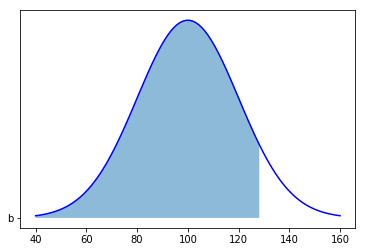

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
x = np.linspace(40, 160, 100)
prob = dist.pdf(x)
plt.plot(x, prob, 'b')
x = np.linspace(40, myqq, 100)
plt.fill_between(x, dist.pdf(x), 'b', alpha=0.5)
pass

**6**. (10 points) Simulate $n$ coin toss experiments, in which you toss a coin $k$ times for each experiment. Find the maximum run length of heads (e.g. the sequence `T,T,H,H,H,T,H,H` has a maximum run length of 3 heads in each experiment. 

In [10]:
import re
n,k = 100, 10
data = np.random.choice(['H','T'], (n,k))
max_len = []
for i in range(n):
    seq = ''.join(data[i])
    longest = max(re.findall(r'H+', seq), key=len)
    max_len.append(len(longest))
max(max_len)

9

In [11]:
n,k = 100, 10
max_len = 0
for i in range(n):
    len_i = 0
    for j in range(k):
        s = np.random.randint(2) # head->1,tail->0
        if s==1:
            len_i += 1
        else:
            max_len = max(max_len, len_i)
            len_i = 0
    max_len = max(max_len, len_i)
max_len

8

**7**. (10 points) Use the DNA sequence given below to answer these questions:

- Generate all sequences formed using a shifting window of size 3 and print the sequence with the highest count. If there are ties, print all the tied sequences. Do not use any import statement.

In [12]:
dna = '''
TCGGATGATTGCACTTATTCTCCGTTTGTTTGTGTGTTGCTGGGGGGGGACGCCTGCACGCTGTTCCAGTGCGTCGTCGT
ATCTTGGTTTGCCTCGGGGGGTGGGGCTGGAGCCTACCAGGTGTCGGTCGGATGTTTTGTCTCTGTGTGTCGAGGGTCGT
GTGGAGTCCCGGCGGGTGGGTGCTGCTGGGTGGTTGACACAGTGCGTGGTGGGTGCTTCAGCGGGGGGTGCCTCGCGCGT
GGCTGGGGTGTTGTAGTTGTCGTTTGGAAAGTGTGCGGCATAGGGGGGATGAAATCCGGTTGACCAAGATTCGGGTCGCG
TTTGGGGATTAGGATAGTTGGGTTTGGAAGGCGCGGGTATTGCCCACGTTCTTTGGCGGGGCGAGGGTGTTGGTACTCCA
TGTCCAGGCCGCTTGCCTACGGACTGTAGAGGTTCGGGAGGCGCTGGCCGGCGTGTGTTCCCTAGGTTTTGAGATAAGAG
'''

In [13]:
dna = dna.strip()
pairs = zip(dna,dna[1:],dna[2:])
count = {}
for p in pairs:
    key = ''.join(p)
#     key = p
    count[key] = count.get(key, 0) + 1
max(count.items(), key=lambda x: x[1])

('GGG', 36)

**8**. (10 points) Ignore spaces, case and punctuation when finding palindromes. Write code to find the palindromes among the 12 phrases below, returning the phrases that are palindromes in a list.

```
Daedalus: nine. Peninsula: dead.
Dammit, I'm mad!
Deliver me from evil.
Dennis and Edna sinned.
Devil never even lived.
Deviled eggs sure taste good.
Did Hannah see bees? Hannah did.
Do geese see God?
Do mice see God?
Dogma: I am God
Dogma: DNA makdes RNA makes protein.
Dubya won? No way, bud.
```

In [14]:
paragraph ='''Daedalus: nine. Peninsula: dead.
Dammit, I'm mad!
Deliver me from evil.
Dennis and Edna sinned.
Devil never even lived.
Deviled eggs sure taste good.
Did Hannah see bees? Hannah did.
Do geese see God?
Do mice see God?
Dogma: I am God
Dogma: DNA makdes RNA makes protein.
Dubya won? No way, bud.'''

In [15]:
import string
lines = paragraph.splitlines()
tr = str.maketrans(string.ascii_uppercase, string.ascii_lowercase, string.punctuation+string.whitespace)
pl = []
for line in lines:
    tmp = line.translate(tr)
    if tmp == tmp[::-1]:
        pl.append(line)
pl

['Daedalus: nine. Peninsula: dead.',
 "Dammit, I'm mad!",
 'Dennis and Edna sinned.',
 'Devil never even lived.',
 'Did Hannah see bees? Hannah did.',
 'Do geese see God?',
 'Dogma: I am God',
 'Dubya won? No way, bud.']

In [16]:
import toolz as tz
import toolz.curried as c
index=tz.pipe(
    paragraph.splitlines(),
    c.map(lambda s: s.translate(str.maketrans(string.ascii_uppercase,string.ascii_lowercase,
                                              string.punctuation+string.whitespace))),
    c.map(lambda s: s==s[::-1]),
    list
)
[line for i,line in enumerate(paragraph.splitlines()) if index[i]]

['Daedalus: nine. Peninsula: dead.',
 "Dammit, I'm mad!",
 'Dennis and Edna sinned.',
 'Devil never even lived.',
 'Did Hannah see bees? Hannah did.',
 'Do geese see God?',
 'Dogma: I am God',
 'Dubya won? No way, bud.']